In [1]:
import numpy as np
import scipy.io
import cv2
# mat = scipy.io.loadmat('dataset/annotations/0001.mat')

In [2]:
import matplotlib.pyplot as plt
image = plt.imread('dataset/annotationsImages/0002.jpg')

(830, 550)


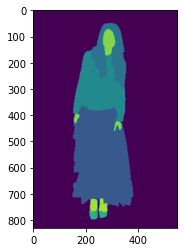

In [3]:
plt.imshow(image)
print(image.shape)

In [4]:
print(image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
label_list = scipy.io.loadmat('dataset/label_list.mat')

In [6]:
label_list['label_list']

array([[array(['null'], dtype='<U4'),
        array(['accessories'], dtype='<U11'),
        array(['bag'], dtype='<U3'), array(['belt'], dtype='<U4'),
        array(['blazer'], dtype='<U6'), array(['blouse'], dtype='<U6'),
        array(['bodysuit'], dtype='<U8'), array(['boots'], dtype='<U5'),
        array(['bra'], dtype='<U3'), array(['bracelet'], dtype='<U8'),
        array(['cape'], dtype='<U4'), array(['cardigan'], dtype='<U8'),
        array(['clogs'], dtype='<U5'), array(['coat'], dtype='<U4'),
        array(['dress'], dtype='<U5'), array(['earrings'], dtype='<U8'),
        array(['flats'], dtype='<U5'), array(['glasses'], dtype='<U7'),
        array(['gloves'], dtype='<U6'), array(['hair'], dtype='<U4'),
        array(['hat'], dtype='<U3'), array(['heels'], dtype='<U5'),
        array(['hoodie'], dtype='<U6'), array(['intimate'], dtype='<U8'),
        array(['jacket'], dtype='<U6'), array(['jeans'], dtype='<U5'),
        array(['jumper'], dtype='<U6'), array(['leggings'], dtyp

# 語意切割

In [7]:
import os
input_path = 'dataset\\photos'
target_path = 'dataset\\annotationsImages'

input_image_paths = sorted([os.path.join(input_path, fileName) for fileName in os.listdir(input_path) if fileName.endswith('.jpg')])

target_label_paths = sorted([os.path.join(target_path, fileName) for fileName in os.listdir(target_path) if fileName.endswith('.jpg')])

In [8]:
target_label_paths

['dataset\\annotationsImages\\0001.jpg',
 'dataset\\annotationsImages\\0002.jpg',
 'dataset\\annotationsImages\\0003.jpg',
 'dataset\\annotationsImages\\0004.jpg',
 'dataset\\annotationsImages\\0005.jpg',
 'dataset\\annotationsImages\\0006.jpg',
 'dataset\\annotationsImages\\0007.jpg',
 'dataset\\annotationsImages\\0008.jpg',
 'dataset\\annotationsImages\\0009.jpg',
 'dataset\\annotationsImages\\0010.jpg',
 'dataset\\annotationsImages\\0011.jpg',
 'dataset\\annotationsImages\\0012.jpg',
 'dataset\\annotationsImages\\0013.jpg',
 'dataset\\annotationsImages\\0014.jpg',
 'dataset\\annotationsImages\\0015.jpg',
 'dataset\\annotationsImages\\0016.jpg',
 'dataset\\annotationsImages\\0017.jpg',
 'dataset\\annotationsImages\\0018.jpg',
 'dataset\\annotationsImages\\0019.jpg',
 'dataset\\annotationsImages\\0020.jpg',
 'dataset\\annotationsImages\\0021.jpg',
 'dataset\\annotationsImages\\0022.jpg',
 'dataset\\annotationsImages\\0023.jpg',
 'dataset\\annotationsImages\\0024.jpg',
 'dataset\\annot

<class 'PIL.JpegImagePlugin.JpegImageFile'>


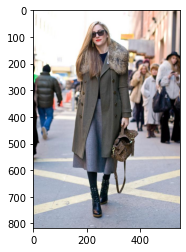

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import  load_img,img_to_array
plt.imshow(load_img(input_image_paths[8]))
print(type(load_img(input_image_paths[8])))

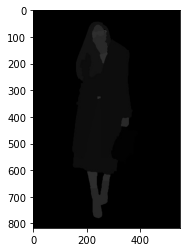

In [10]:
plt.imshow(load_img(target_label_paths[8]))

In [11]:
#分成training set和testing set
import numpy as np
np.random.seed(9999)
idx = np.random.permutation(1000)+1
training_idx = idx[:500]
testing_idx  = idx[750:]

In [12]:
training_image_paths = np.array(input_image_paths)[training_idx]
training_label_paths = np.array(target_label_paths)[training_idx]
print(training_image_paths.shape)
print(training_label_paths.shape)

(500,)
(500,)


In [13]:
test_image_paths = np.array(input_image_paths)[testing_idx]
test_label_paths = np.array(target_label_paths)[testing_idx]
print(test_image_paths.shape)
print(test_label_paths.shape)

(250,)
(250,)


In [14]:
training_label_paths

array(['dataset\\annotationsImages\\0206.jpg',
       'dataset\\annotationsImages\\0698.jpg',
       'dataset\\annotationsImages\\0639.jpg',
       'dataset\\annotationsImages\\0608.jpg',
       'dataset\\annotationsImages\\0029.jpg',
       'dataset\\annotationsImages\\0783.jpg',
       'dataset\\annotationsImages\\0598.jpg',
       'dataset\\annotationsImages\\0924.jpg',
       'dataset\\annotationsImages\\0257.jpg',
       'dataset\\annotationsImages\\0399.jpg',
       'dataset\\annotationsImages\\0023.jpg',
       'dataset\\annotationsImages\\0265.jpg',
       'dataset\\annotationsImages\\0893.jpg',
       'dataset\\annotationsImages\\0735.jpg',
       'dataset\\annotationsImages\\0092.jpg',
       'dataset\\annotationsImages\\0921.jpg',
       'dataset\\annotationsImages\\0895.jpg',
       'dataset\\annotationsImages\\0282.jpg',
       'dataset\\annotationsImages\\0168.jpg',
       'dataset\\annotationsImages\\0116.jpg',
       'dataset\\annotationsImages\\0913.jpg',
       'datas

In [15]:
image_size = (168  ,120)

In [16]:
def path_to_input_image(path):
    return img_to_array(load_img(path,target_size=image_size)).astype('uint8')

def path_to_target(path):
    img = img_to_array(load_img(path,target_size=image_size,color_mode = 'grayscale'))
    img = img.astype('uint8')
    return img

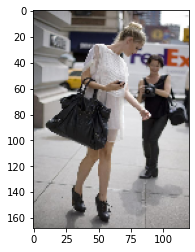

In [17]:
training_image = []
for path in training_image_paths:
    training_image.append(path_to_input_image(path))
training_image = np.stack(training_image)
training_image.shape
plt.imshow(training_image[10])

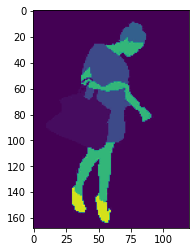

In [18]:
training_label = []
for path in training_label_paths:
    training_label.append(path_to_target(path))
training_label = np.stack(training_label)
training_label.shape
plt.imshow(training_label[10,:,:,0])

In [19]:
training_label[10,:,:,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## 建立網路

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=image_size+(3,))
x = layers.Rescaling(1.0/255)(inputs)
x = layers.Conv2D(64, 3, strides=2,activation='relu',padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu',padding='same')(x)
x = layers.Conv2D(128, 3, strides=2,activation='relu',padding='same')(x)
x = layers.Conv2D(128, 3,activation='relu',padding='same')(x)
# x = layers.Conv2D(256, 3, strides=2,activation='relu',padding='same')(x)
# x = layers.Conv2D(256, 3,activation='relu',padding='same')(x)
# x = layers.Conv2DTranspose(256, 3,activation='relu',padding='same')(x)
# x = layers.Conv2DTranspose(256, 3,strides=2,activation='relu',padding='same')(x)
x = layers.Conv2DTranspose(128, 3,activation='relu',padding='same')(x)
x = layers.Conv2DTranspose(128, 3,strides=2,activation='relu',padding='same')(x)
x = layers.Conv2DTranspose(64, 3,activation='relu',padding='same')(x)
x = layers.Conv2DTranspose(64, 3,strides=2,activation='relu',padding='same')(x)

outputs = layers.Conv2D(59,3,activation='softmax',padding='same')(x)

model = keras.Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 168, 120, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 168, 120, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 84, 60, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 84, 60, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 30, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 30, 128)       147584    
                                                                 
 conv2d_transpose (Conv2DTra  (None, 42, 30, 128)      147584

In [21]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy")
model.fit(training_image,training_label,epochs=50,batch_size=64)

Epoch 1/50
8/8 [==============================] - 11s 769ms/step - loss: nan
Epoch 2/50
8/8 [==============================] - 2s 297ms/step - loss: nan
Epoch 3/50
8/8 [==============================] - 2s 297ms/step - loss: nan
Epoch 4/50
8/8 [==============================] - 2s 297ms/step - loss: nan
Epoch 5/50
8/8 [==============================] - 2s 297ms/step - loss: nan
Epoch 6/50
8/8 [==============================] - 2s 296ms/step - loss: nan
Epoch 7/50
8/8 [==============================] - 2s 296ms/step - loss: nan
Epoch 8/50
8/8 [==============================] - 2s 296ms/step - loss: nan
Epoch 9/50
8/8 [==============================] - 2s 297ms/step - loss: nan
Epoch 10/50
8/8 [==============================] - 2s 297ms/step - loss: nan
Epoch 11/50
8/8 [==============================] - 2s 301ms/step - loss: nan
Epoch 12/50
8/8 [==============================] - 2s 297ms/step - loss: nan
Epoch 13/50
8/8 [==============================] - 2s 297ms/step - loss: nan
Epoch 1

In [22]:
# model.predict(training_image)[0]

In [23]:
def display_mask(pred):
    mask = np.argmax(pred,axis=-1)
    plt.imshow(mask)

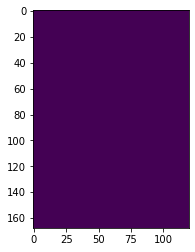

In [24]:
display_mask(model.predict(training_image[np.newaxis,0])[0])